## Numpy

In [1]:
import numpy as np

### Хранение np.array: Contiguous vs Fortran

>Какой бы shape ни имел массив, в памяти он хранится как обыкновенный линейный массив.  
В примере показан C-order хранения многомерного массива ("укладываем" массив по строкам => последний индекс является самым быстрым). Такие массивы называют C-contiguous.  
Альтернативой является Fortran-order, где массив "укладывается" по столбцам => первый индекс является самым быстрым. Такие массивы называют Fortran-contiguous.

Примеры ниже исследуют этот вопрос

In [16]:
sz = 10**4

c = np.zeros((sz, sz))              # По строкам
f = np.zeros((sz, sz), order = 'F') # По столбцам

%timeit np.add(c, 1, out=c)
%timeit np.add(f, 1, out=f)

83.7 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
84.4 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
sz = 10**3

c = np.zeros((sz, sz))              # По строкам
f = np.zeros((sz, sz), order = 'F') # По столбцам

def test_arr(arr):
    for i in range(sz):
        for j in range(sz):
            arr[i,j] += 1

%timeit test_arr(c)
%timeit test_arr(f)

242 ms ± 7.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
292 ms ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Псевдокод
```CPython
def test_arr(arr):
  np.array.data* p     = &arr.data
  np.array.data* p_end = &arr.data + arr.size
  while (*p < *p_end):
    ++(*p)
    ++p
```

### Упражнение 10
Найти ближайшее значение к числу 4 в векторе [4.3, 1.0, 3.9, 5.0, 2.0, 1.9]

In [5]:
a   = np.array([4.3, 1.0, 3.9, 5.0, 2.0, 1.9])
idx = np.abs(a - 4).argmin()

a[idx]

np.float64(3.9)

### Векторизация функций

In [6]:
def func(x):
    return x**2

v_func = np.vectorize(func)

a = np.array([1, 2, 3])

v_func(a)

array([1, 4, 9])

## Matplotlib

In [7]:
import matplotlib.pyplot as plt

### Построить и сохранить график

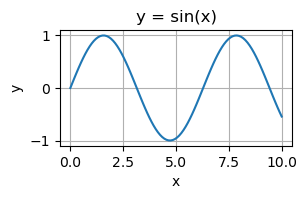

In [8]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize = (3, 1.5))

plt.plot(x, y)

plt.title("y = sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

### plt.subplots

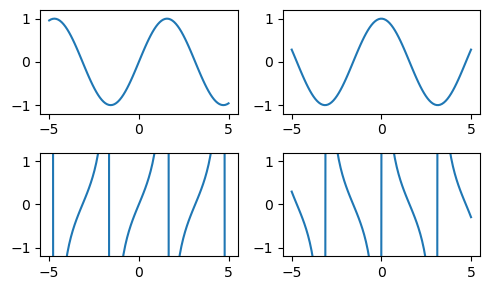

In [9]:
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 2, figsize=(5, 3))

for ax in axes.flat:
    ax.set_ylim(-1.2, 1.2)

axes[0, 0].plot(x, np.sin(x))
axes[0, 1].plot(x, np.cos(x))
axes[1, 0].plot(x, np.tan(x))
axes[1, 1].plot(x, 1/np.tan(x))

plt.tight_layout()
plt.savefig("img/trig.png")
plt.show()

### Логарифмическая шкала

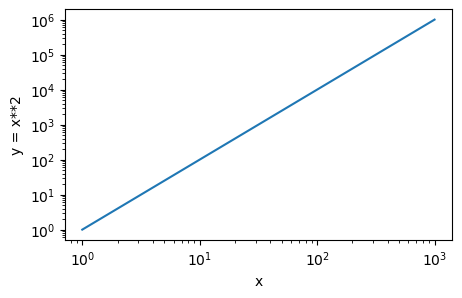

In [10]:
x = np.logspace(0, 3, 100)
y = x**2

plt.figure(figsize = (5, 3))

# обе оси в логарифмической шкале
plt.loglog(x, y)

plt.xlabel("x")
plt.ylabel("y = x**2")

plt.show()

### pcolormesh()

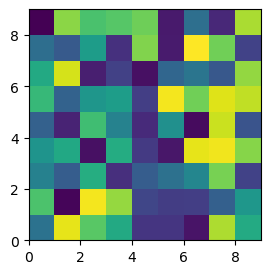

In [11]:
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)

np.random.seed(42)
z = np.random.rand(9,9)

fig,ax = plt.subplots(figsize=(3,3))
ax.pcolormesh(x,y,z)

plt.savefig("img/colormesh.png")

plt.show()

### plot_surface() contour()

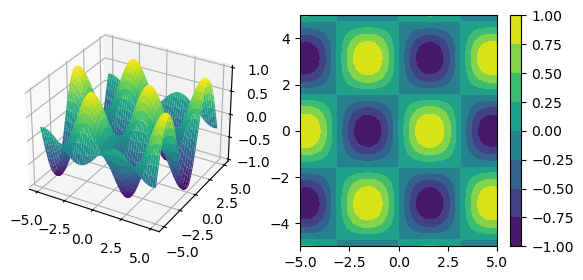

In [12]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x,y = np.meshgrid(x,y)

z = np.sin(x)*np.cos(y)

fig = plt.figure(figsize=(7,3))

# поверхность
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(x, y, z, cmap="viridis")

# контуры
ax2 = fig.add_subplot(122)
contour = ax2.contourf(x, y, z, cmap="viridis")
fig.colorbar(contour, ax=ax2)

plt.savefig("img/3d.png")
plt.show()

### imshow()

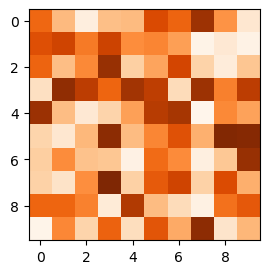

In [13]:
arr = np.random.rand(10,10)

fig = plt.figure(figsize=(3,3))
plt.imshow(arr, cmap="Oranges")
plt.savefig("img/imshow.png")

# plt.colormaps()